## 1. Membaca Dataset

In [1]:
import pandas as pd

In [2]:
# Membaca file csv
df = pd.read_csv("StudentsPerformanceDirty.csv")

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74.0
1,female,group C,some college,standard,completed,69,90,88.0
2,female,group B,master's degree,standard,none,90,95,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44.0
4,male,group C,some college,standard,none,76,78,75.0


In [3]:
# Mengecek ukuran dataframe
print(df.shape)

(1004, 8)


Dataset memiliki 1004 baris dan 8 kolom/feature

In [4]:
# Mengecek karakteristik dari masing-masing kolom (tipe data, jumlah null atau missing value, nama-nama kolom)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1003 non-null   object 
 1   race/ethnicity               1003 non-null   object 
 2   parental level of education  1004 non-null   object 
 3   lunch                        1004 non-null   object 
 4   test preparation course      1003 non-null   object 
 5   math score                   1004 non-null   int64  
 6   reading score                1004 non-null   int64  
 7   writing score                1003 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 62.9+ KB
None


Terdapat kolom/features yang memiliki missing value (hanya 1003 yang non-null)

In [5]:
df.isnull().sum()

gender                         1
race/ethnicity                 1
parental level of education    0
lunch                          0
test preparation course        1
math score                     0
reading score                  0
writing score                  1
dtype: int64

## 2. Data Cleaning

In [6]:
# Menampilkan distribusi data berdasarkan 'gender'
df.groupby('gender').count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,,,,,,,
female,519,519,519,518,519,519,519
male,483,484,484,484,484,484,483


Gender female lebih banyak datanya dibandingkan dengan gender male

In [7]:
# Mengisi missing values pada kolom 'gender' dengan "female"
df['gender'] = df['gender'].fillna("female")
df[df.isna().any(axis=1)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
673,male,NaN,high school,standard,completed,82,84,82.0
842,female,group E,master's degree,standard,NaN,94,99,100.0
1003,male,group B,high school,standard,none,67,76,NaN


In [8]:
# Mengisi missing values pada kolom 'writing score' dengan median
df['writing score'] = df['writing score'].fillna(df['writing score'].median())
df[df.isna().any(axis=1)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
673,male,NaN,high school,standard,completed,82,84,82.0
842,female,group E,master's degree,standard,NaN,94,99,100.0


In [9]:
# Meng-drop/hapus baris yang memiliki missing values
df = df.dropna(subset=['test preparation course', 'race/ethnicity'], inplace=False)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1002 entries, 0 to 1003
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1002 non-null   object 
 1   race/ethnicity               1002 non-null   object 
 2   parental level of education  1002 non-null   object 
 3   lunch                        1002 non-null   object 
 4   test preparation course      1002 non-null   object 
 5   math score                   1002 non-null   int64  
 6   reading score                1002 non-null   int64  
 7   writing score                1002 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 70.5+ KB
None


In [10]:
# Menyimpan data yang telah di cleaning
df.to_csv("StudentPerformanceClean.csv")

## 3. Exploratory Data Analysis

In [11]:
# df.describe() untuk mendapatkan nilai dari descriptive statistics (mean, median, max, min, dll. )
df.describe()

,math score,reading score,writing score
count,1002.000000,1002.000000,1002.000000
mean,66.061876,69.166667,68.036926
std,15.173922,14.590075,15.191210
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.250000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


<Axes: xlabel='gender'>

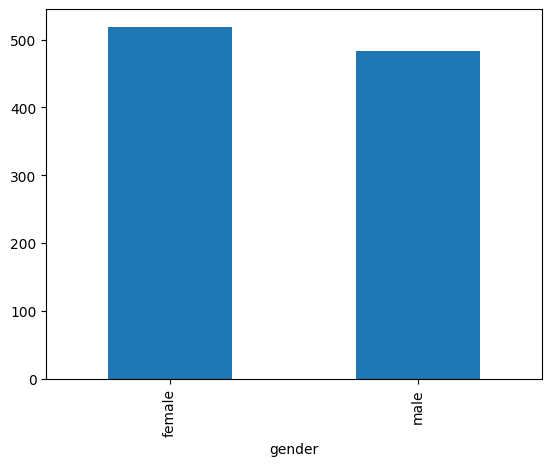

In [12]:
# Melihat distibusi gender dengan menggunakan bar chart
df['gender'].value_counts().plot.bar()

<Axes: xlabel='race/ethnicity'>

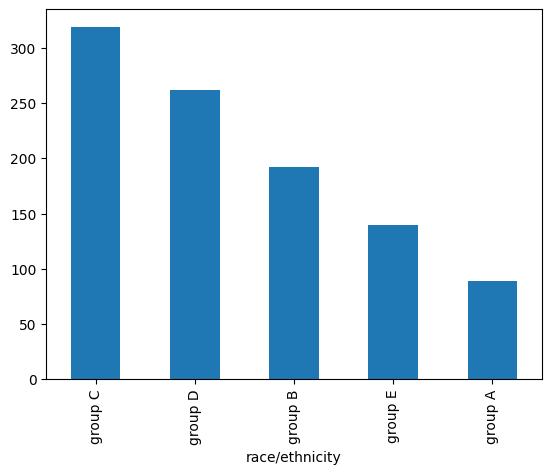

In [13]:
df['race/ethnicity'].value_counts().plot.bar()

<Axes: xlabel='parental level of education'>

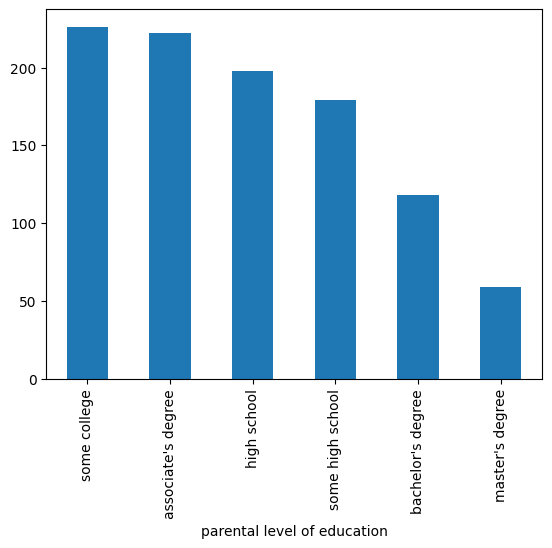

In [14]:
df['parental level of education'].value_counts().plot.bar()

<Axes: xlabel='test preparation course'>

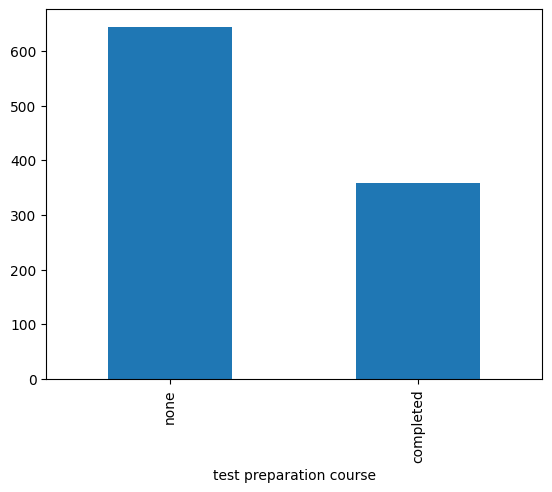

In [15]:
df['test preparation course'].value_counts().plot.bar()

<Axes: xlabel='lunch'>

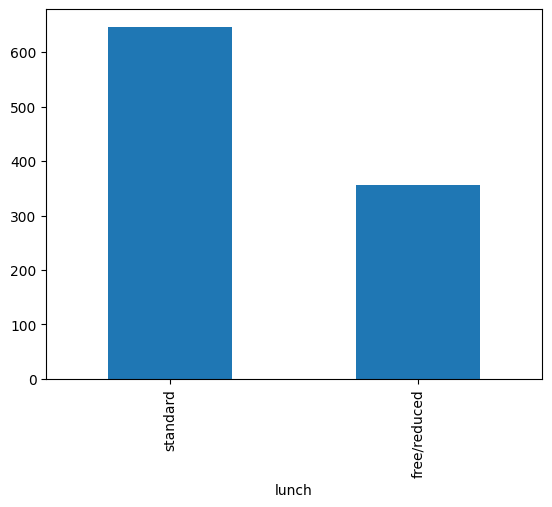

In [16]:
df['lunch'].value_counts().plot.bar()

array([[<Axes: title={'center': 'math score'}>]], dtype=object)

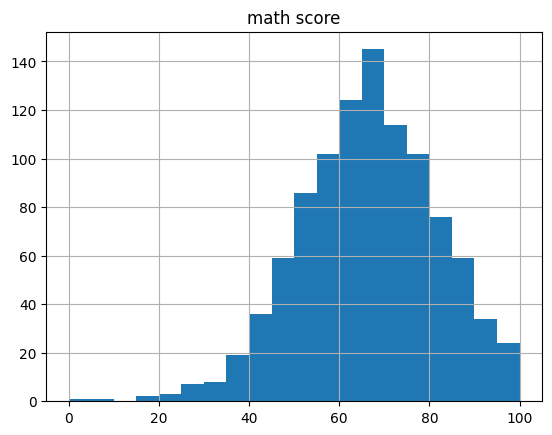

In [17]:
df.hist(column='math score', bins=20)

array([[<Axes: title={'center': 'reading score'}>]], dtype=object)

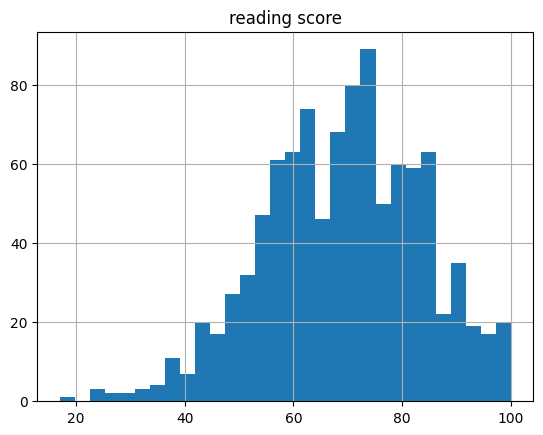

In [18]:
df.hist(column='reading score', bins=30)

array([[<Axes: title={'center': 'writing score'}>]], dtype=object)

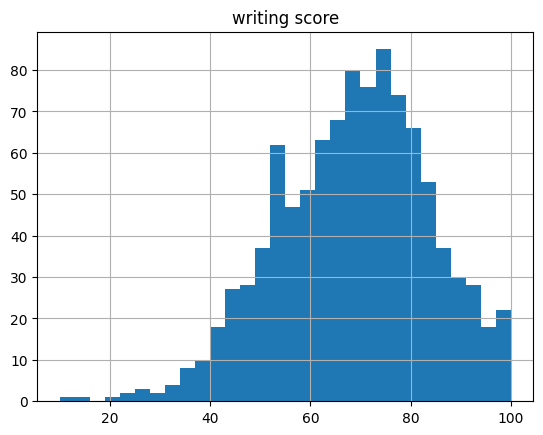

In [19]:
df.hist(column='writing score', bins=30)

## 4. Feature Engineering

In [20]:
genderEncoding = pd.get_dummies(df['gender'])

df_encoded = df.join(genderEncoding)
df_encoded.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,female,male
0,female,group B,bachelor's degree,standard,none,72,72,74.0,True,False
1,female,group C,some college,standard,completed,69,90,88.0,True,False
2,female,group B,master's degree,standard,none,90,95,93.0,True,False
3,male,group A,associate's degree,free/reduced,none,47,57,44.0,False,True
4,male,group C,some college,standard,none,76,78,75.0,False,True


In [21]:
# Menghapus kolom gender karena sudah terdapat variabel 'female' dan 'male'
df_encoded = df_encoded.drop('gender',axis = 1)
df_encoded.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,female,male
0,group B,bachelor's degree,standard,none,72,72,74.0,True,False
1,group C,some college,standard,completed,69,90,88.0,True,False
2,group B,master's degree,standard,none,90,95,93.0,True,False
3,group A,associate's degree,free/reduced,none,47,57,44.0,False,True
4,group C,some college,standard,none,76,78,75.0,False,True


In [22]:
raceEncoding = pd.get_dummies(df_encoded['race/ethnicity'])

df_encoded = df_encoded.join(raceEncoding)
df_encoded.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,female,male,group A,group B,group C,group D,group E
0,group B,bachelor's degree,standard,none,72,72,74.0,True,False,False,True,False,False,False
1,group C,some college,standard,completed,69,90,88.0,True,False,False,False,True,False,False
2,group B,master's degree,standard,none,90,95,93.0,True,False,False,True,False,False,False
3,group A,associate's degree,free/reduced,none,47,57,44.0,False,True,True,False,False,False,False
4,group C,some college,standard,none,76,78,75.0,False,True,False,False,True,False,False


In [23]:
df_encoded = df_encoded.drop('race/ethnicity', axis=1)
df_encoded.head()

,parental level of education,lunch,test preparation course,math score,reading score,writing score,female,male,group A,group B,group C,group D,group E
0,bachelor's degree,standard,none,72,72,74.0,True,False,False,True,False,False,False
1,some college,standard,completed,69,90,88.0,True,False,False,False,True,False,False
2,master's degree,standard,none,90,95,93.0,True,False,False,True,False,False,False
3,associate's degree,free/reduced,none,47,57,44.0,False,True,True,False,False,False,False
4,some college,standard,none,76,78,75.0,False,True,False,False,True,False,False


In [24]:
# Menggunakan .unique() karena variabel ordinal
df_encoded['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [25]:
# Membuat dictionary untuk melakukan mapping variabel kategorikal menjadi variabel numerikal
parents_edu = {'parental level of education': {"some high school": 1, "high school": 2, "some college": 3, "associate's degree": 4, "bachelor's degree": 5, "master's degree": 6}}

df_encoded = df_encoded.replace(parents_edu)
df_encoded

,parental level of education,lunch,test preparation course,math score,reading score,writing score,female,male,group A,group B,group C,group D,group E
0,5,standard,none,72,72,74.0,True,False,False,True,False,False,False
1,3,standard,completed,69,90,88.0,True,False,False,False,True,False,False
2,6,standard,none,90,95,93.0,True,False,False,True,False,False,False
3,4,free/reduced,none,47,57,44.0,False,True,True,False,False,False,False
4,3,standard,none,76,78,75.0,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,2,free/reduced,none,62,55,55.0,False,True,False,False,True,False,False
1000,2,free/reduced,completed,59,71,65.0,True,False,False,False,True,False,False
1001,3,standard,completed,68,78,77.0,True,False,False,False,False,True,False
1002,3,free/reduced,none,77,86,86.0,True,False,False,False,False,True,False


In [26]:
# Melakukan hal yang sama pada variabel 'lunch' dan 'test preparation course'
lunch = {'lunch': {"free/reduced": 0, "standard": 1}}
testPrep = {'test preparation course': {'none': 0, 'completed': 1}}

df_encoded = df_encoded.replace(lunch)
df_encoded = df_encoded.replace(testPrep)
df_encoded.head()

,parental level of education,lunch,test preparation course,math score,reading score,writing score,female,male,group A,group B,group C,group D,group E
0,5,1,0,72,72,74.0,True,False,False,True,False,False,False
1,3,1,1,69,90,88.0,True,False,False,False,True,False,False
2,6,1,0,90,95,93.0,True,False,False,True,False,False,False
3,4,0,0,47,57,44.0,False,True,True,False,False,False,False
4,3,1,0,76,78,75.0,False,True,False,False,True,False,False


In [27]:
# Mencari korelasi dalam bentuk angka
df_encoded.corr()

,parental level of education,lunch,test preparation course,math score,reading score,writing score,female,male,group A,group B,group C,group D,group E
parental level of education,1.000000,-0.022772,-0.006032,0.160394,0.190864,0.237250,0.043919,-0.043919,-0.062559,-0.073239,0.040895,0.016101,0.059117
lunch,-0.022772,1.000000,-0.016564,0.352396,0.230411,0.246949,-0.023390,0.023390,-0.032099,-0.009454,-0.002966,-0.009083,0.052571
test preparation course,-0.006032,-0.016564,1.000000,0.178633,0.241691,0.313390,-0.005965,0.005965,-0.005845,-0.003169,0.013528,-0.055018,0.059951
math score,0.160394,0.352396,0.178633,1.000000,0.817118,0.802900,-0.169372,0.169372,-0.091252,-0.087423,-0.072005,0.051031,0.206189
reading score,0.190864,0.230411,0.241691,0.817118,1.000000,0.954406,0.242903,-0.242903,-0.096185,-0.060339,-0.002963,0.035249,0.106726
writing score,0.237250,0.246949,0.313390,0.802900,0.954406,1.000000,0.299501,-0.299501,-0.110274,-0.080178,-0.009422,0.082614,0.089453
female,0.043919,-0.023390,-0.005965,-0.169372,0.242903,0.299501,1.000000,-1.000000,-0.070901,0.028170,0.063324,-0.030482,-0.020250
male,-0.043919,0.023390,0.005965,0.169372,-0.242903,-0.299501,-1.000000,1.000000,0.070901,-0.028170,-0.063324,0.030482,0.020250
group A,-0.062559,-0.032099,-0.005845,-0.091252,-0.096185,-0.110274,-0.070901,0.070901,1.000000,-0.152008,-0.213376,-0.185778,-0.125826
group B,-0.073239,-0.009454,-0.003169,-0.087423,-0.060339,-0.080178,0.028170,-0.028170,-0.152008,1.000000,-0.332731,-0.289696,-0.196209


In [28]:
df_encoded.to_csv("sp-eda-result.csv")

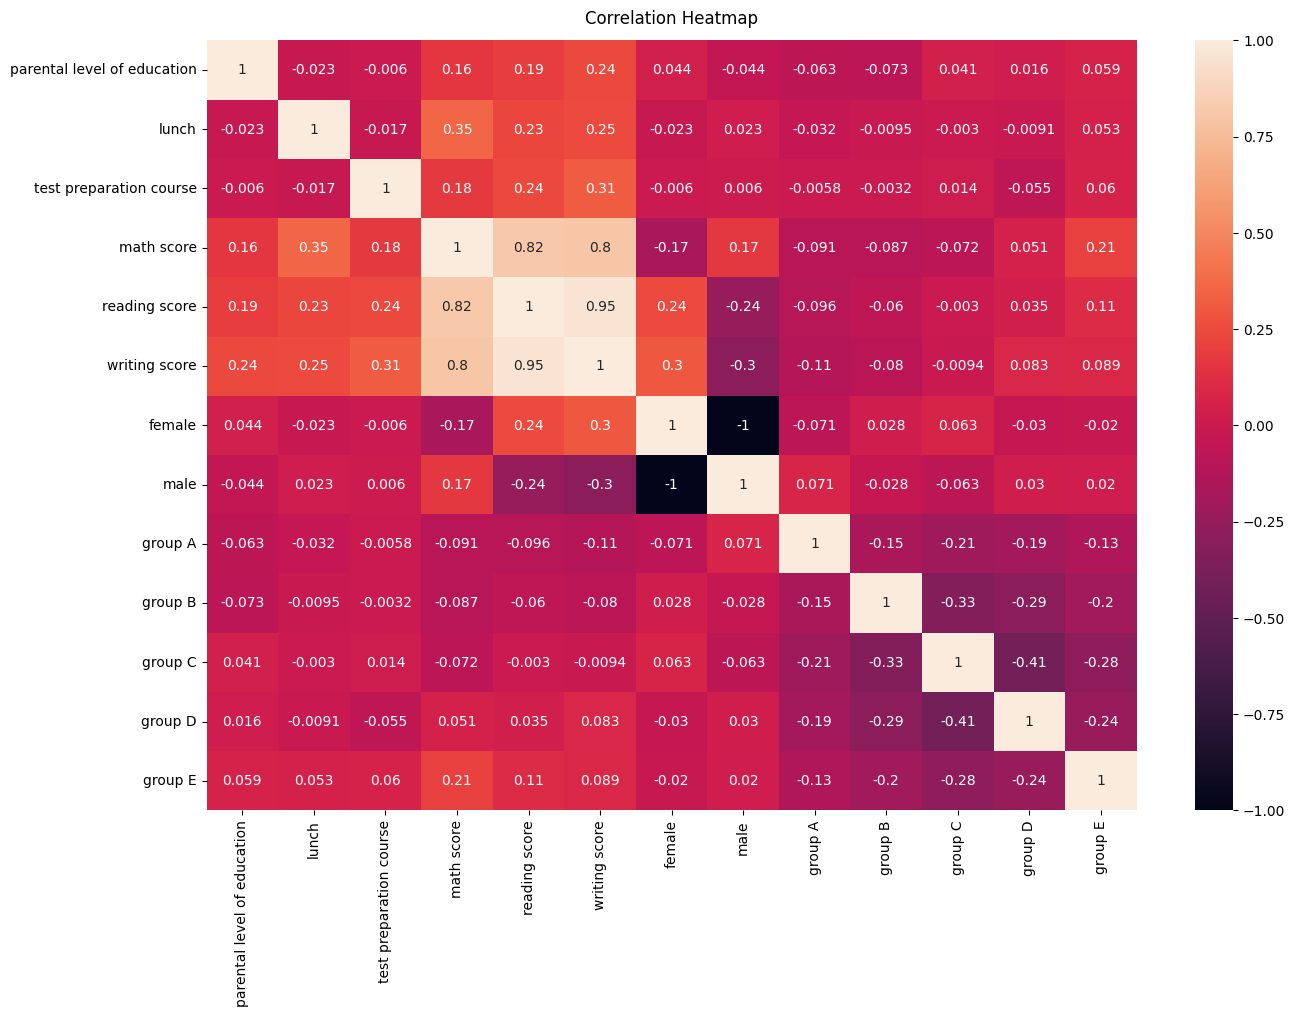

In [29]:
# Membuat heatmap

import matplotlib.pyplot as plt
import seaborn as sns

# menentukan ukuran plot
plt.figure(figsize=(15, 10))
# membuat korelasi heatmap
heatmap = sns.heatmap(df_encoded.corr(), vmin=-1, vmax=1, annot = True)
# menentukan format plot (judul, ukuran text)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [30]:
sp_df = pd.read_csv("sp-eda-result.csv")
sp_df.head()

,Unnamed: 0,parental level of education,lunch,test preparation course,math score,reading score,writing score,female,male,group A,group B,group C,group D,group E
0,0,5,1,0,72,72,74.0,True,False,False,True,False,False,False
1,1,3,1,1,69,90,88.0,True,False,False,False,True,False,False
2,2,6,1,0,90,95,93.0,True,False,False,True,False,False,False
3,3,4,0,0,47,57,44.0,False,True,True,False,False,False,False
4,4,3,1,0,76,78,75.0,False,True,False,False,True,False,False


In [31]:
# Menghapus kolom Unnamed
sp_df.drop(columns=["Unnamed: 0"], inplace=True)

In [32]:
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   parental level of education  1002 non-null   int64  
 1   lunch                        1002 non-null   int64  
 2   test preparation course      1002 non-null   int64  
 3   math score                   1002 non-null   int64  
 4   reading score                1002 non-null   int64  
 5   writing score                1002 non-null   float64
 6   female                       1002 non-null   bool   
 7   male                         1002 non-null   bool   
 8   group A                      1002 non-null   bool   
 9   group B                      1002 non-null   bool   
 10  group C                      1002 non-null   bool   
 11  group D                      1002 non-null   bool   
 12  group E                      1002 non-null   bool   
dtypes: bool(7), float6

In [33]:
sp_df.describe()

,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000
mean,3.078842,0.644711,0.357285,66.061876,69.166667,68.036926
std,1.459671,0.478840,0.479439,15.173922,14.590075,15.191210
min,1.000000,0.000000,0.000000,0.000000,17.000000,10.000000
25%,2.000000,0.000000,0.000000,57.000000,59.000000,57.250000
50%,3.000000,1.000000,0.000000,66.000000,70.000000,69.000000
75%,4.000000,1.000000,1.000000,77.000000,79.000000,79.000000
max,6.000000,1.000000,1.000000,100.000000,100.000000,100.000000


## 5. EDA Recap

Text(0.5, 1.0, 'Math and Writing')

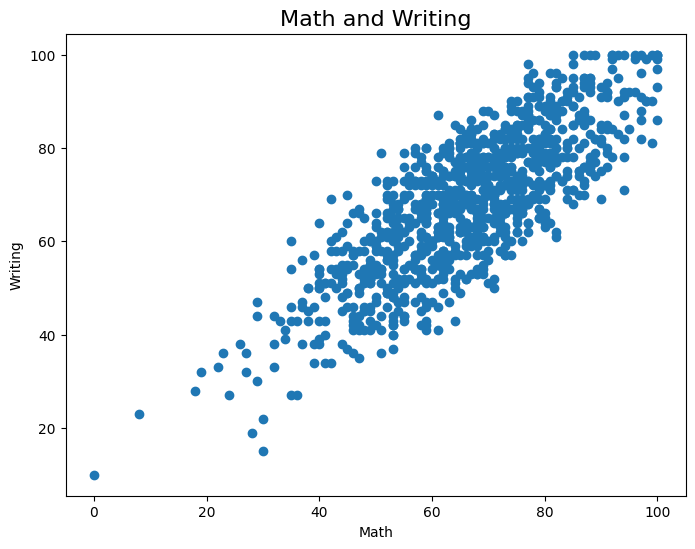

In [34]:
# Melihat persebaran data math score dengan writing score

plt.figure(figsize=(8, 6))
plt.scatter(sp_df['math score'], sp_df['writing score'])
plt.xlabel("Math")
plt.ylabel("Writing")
plt.title("Math and Writing", size=16)

Text(0.5, 1.0, 'Math and Reading')

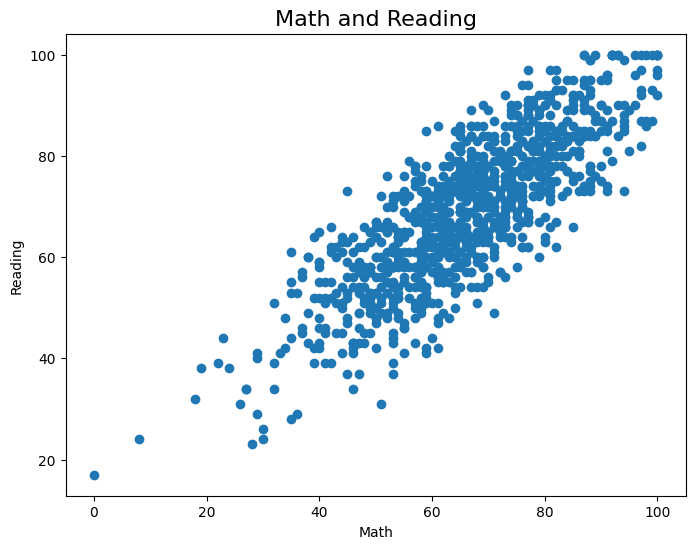

In [35]:
# Membandingkan dengan reading score
plt.figure(figsize=(8, 6))
plt.scatter(sp_df['math score'], sp_df['reading score'])

plt.xlabel("Math")
plt.ylabel("Reading")
plt.title("Math and Reading", size=16)

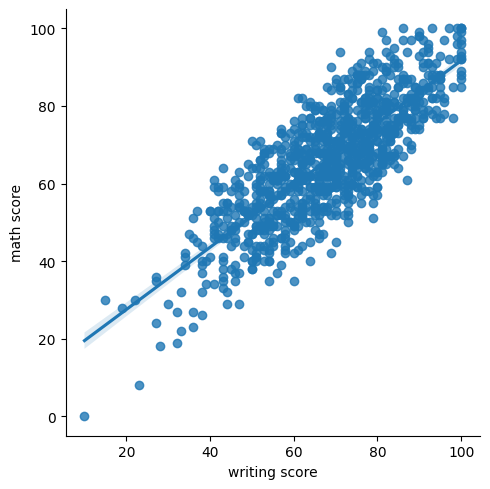

In [36]:
# Menampilkan persebaran data writing score dan math score (scatter plot) dengan tambahan garis linear regression
sns.lmplot(x='writing score',y='math score', data = sp_df)

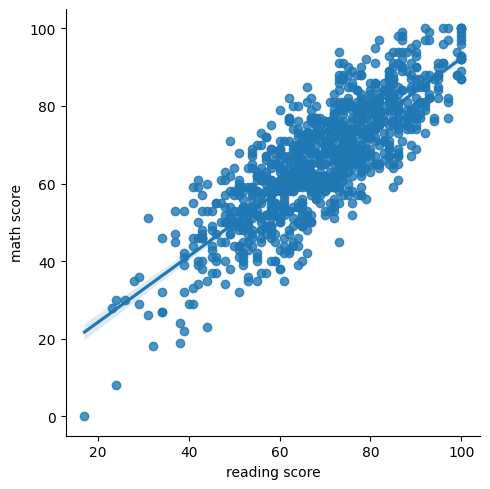

In [38]:
# Menampilkan persebaran data writing score dan math score (scatter plot) dengan tambahan garis linear regression
sns.lmplot(x='reading score',y='math score', data = sp_df)

## 6. Model Building

In [39]:
# Import libraries yang dibutuhkan
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [40]:
# Memilih kolom untuk digunakan sebagai fitur model
x = sp_df.drop(columns=['math score'])
# Memilih kolom untuk digunakan sebagai variabel target
y = sp_df['math score']

# Membagi data ke training dan testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print("X_train : ", x_train.shape)
print("X_test : ", x_test.shape)
print("Y_train : ", y_train.shape)
print("Y_test : ", y_test.shape)

X_train :  (801, 12)
X_test :  (201, 12)
Y_train :  (801,)
Y_test :  (201,)


In [41]:
# Membuat model linear regression
linear_regression_model = LinearRegression()
# Men-training model dengan dataset yang sesuai
linear_regression_model.fit(x_train,y_train)

LinearRegression()

In [42]:
# Mengambil koefisien yang didapatkan dari model
linear_regression_model.coef_

array([-0.38630973,  3.2547585 , -3.35912494,  0.25507618,  0.71169182,
       -6.60912738,  6.60912738, -1.49569078, -0.19003249, -1.11563891,
       -1.11811654,  3.91947872])

In [43]:
# Menampilkan hasil linear regression (koefisien dari model)
coeff_df = pd.DataFrame(linear_regression_model.coef_, x.columns, columns = ["Coefficient"])
coeff_df

,Coefficient
parental level of education,-0.386310
lunch,3.254758
test preparation course,-3.359125
reading score,0.255076
writing score,0.711692
female,-6.609127
male,6.609127
group A,-1.495691
group B,-0.190032
group C,-1.115639


In [44]:
# mengambil bias dari model
linear_regression_model.intercept_

0.8905251604678739

## 7. Evaluation

In [45]:
# Menggunakan model untuk memprediksi nilai matematika menggunakan testing dataset
predictions = linear_regression_model.predict(x_test)

In [46]:
df_test_set = x_test
df_test_set = df_test_set.join(y_test)
df_test_set['PREDICTED SCORE'] = predictions
df_test_set.head(5)

,parental level of education,lunch,test preparation course,reading score,writing score,female,male,group A,group B,group C,group D,group E,math score,PREDICTED SCORE
769,1,1,0,71,75.0,True,False,False,False,False,True,False,68,67.519025
285,1,1,0,46,46.0,True,False,False,True,False,False,False,37,41.431142
102,5,1,1,74,74.0,False,True,False,False,False,True,False,68,75.886453
156,3,1,1,89,88.0,True,False,False,False,True,False,False,70,77.233124
710,4,0,1,61,58.0,True,False,False,False,False,True,False,42,45.096690


Text(0, 0.5, 'Predicted Math Scores')

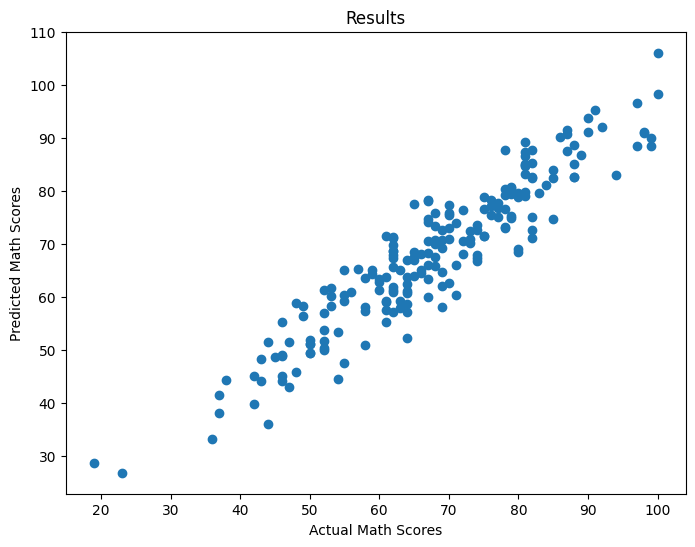

In [47]:
# Membandingkan hasil prediksi dan nilai asli
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.title("Results")
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")

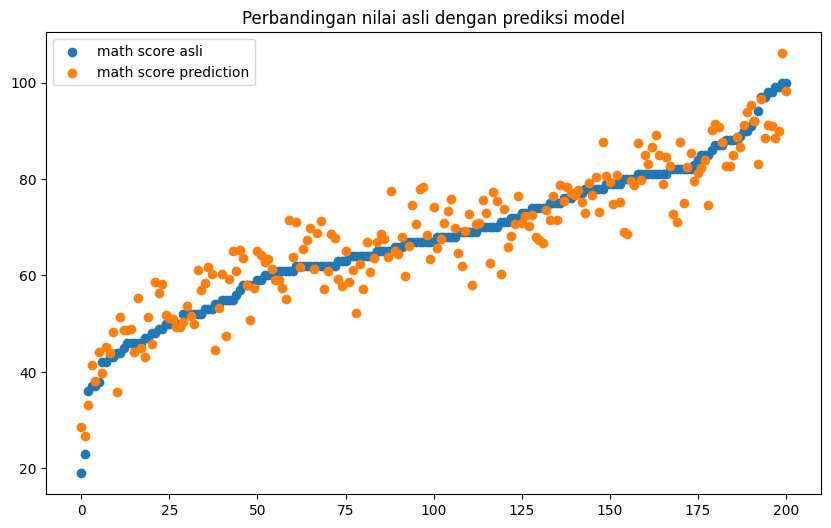

In [48]:
import numpy as np
plt.figure(figsize=(10, 6))

# Mengurutkan nilai asli dari terkecil hingga tertinggi
y_sorted = np.sort(y_test.tolist())
y_sorted_index = np.argsort(y_test.tolist())

# Merubah urutan prediction score berdasarkan urutan y_sorted
predictions_sorted = predictions[y_sorted_index]

# Plot kedua score
plt.scatter(np.arange(0,len(y_sorted)), y_sorted, label='math score asli')
plt.scatter(np.arange(0,len(y_sorted)), predictions_sorted, label='math score prediction')
plt.title("Perbandingan nilai asli dengan prediksi model")
plt.legend()

In [49]:
# Mengevaluasi model dengan 3 metrik berbeda
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.304812452418108
MSE: 28.494836407118438
RMSE: 5.338055489325531


## 8. Dengan 2 Variabel

In [51]:
# Memilih kolom untuk digunakan sebagai fitur dan variabel target
X = sp_df[['writing score', 'reading score']]
Y = sp_df['math score']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print("X_train : ", X_train.shape)
print("X_test : ", X_test.shape)
print("Y_train : ", Y_train.shape)
print("Y_test : ", Y_test.shape)

X_train :  (801, 2)
X_test :  (201, 2)
Y_train :  (801,)
Y_test :  (201,)


In [52]:
df_test_set2 = X_test
df_test_set2 = df_test_set2.join(Y_test)
df_test_set2['PREDICTED SCORE'] = predictions
df_test_set2.head(5)

,writing score,reading score,math score,PREDICTED SCORE
501,82.0,79,74,67.519025
950,73.0,75,57,41.431142
382,95.0,100,87,75.886453
89,67.0,70,58,77.233124
23,73.0,73,69,45.096690


In [53]:
linear_regression_model_2 = LinearRegression()
linear_regression_model_2.fit(X_train,Y_train)

LinearRegression()

In [54]:
coeff_df2 = pd.DataFrame(linear_regression_model_2.coef_, X.columns, columns = ["Coefficient"])
coeff_df2

,Coefficient
writing score,0.277498
reading score,0.571925


In [55]:
linear_regression_model_2.intercept_

7.731927605096459

Text(0, 0.5, 'Predicted Math Scores')

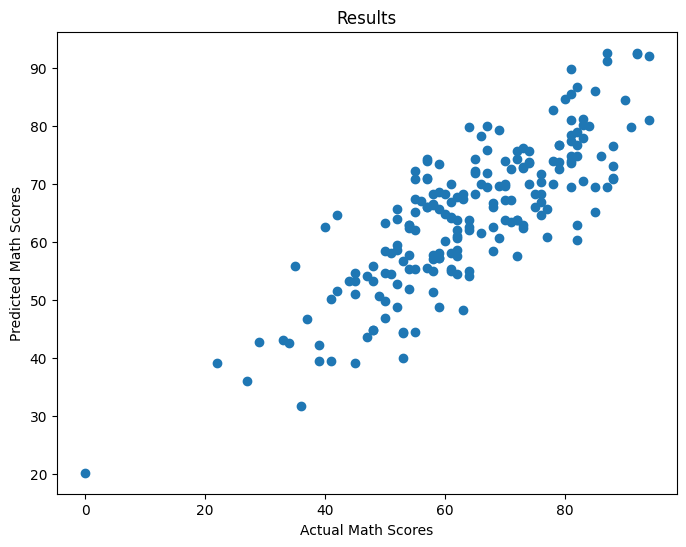

In [56]:
predictions2 = linear_regression_model_2.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, predictions2)
plt.title("Results")
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")

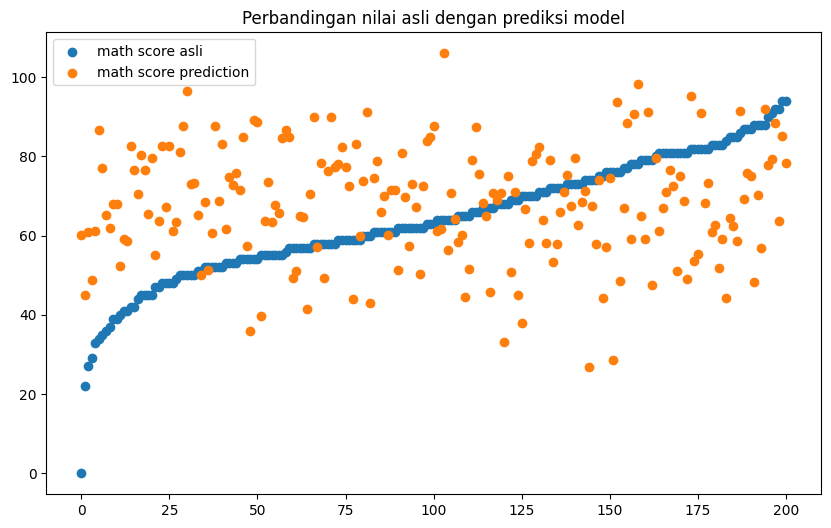

In [57]:
plt.figure(figsize=(10, 6))

# Mengurutkan nilai asli dari terkecil hingga tertinggi
Y_sorted = np.sort(Y_test.tolist())
Y_sorted_index = np.argsort(Y_test.tolist())

# Merubah urutan prediction score berdasarkan urutan Y_sorted
predictions_sorted = predictions[Y_sorted_index]

# Plot kedua score
plt.scatter(np.arange(0,len(Y_sorted)), Y_sorted, label='math score asli')
plt.scatter(np.arange(0,len(Y_sorted)), predictions_sorted, label='math score prediction')
plt.title("Perbandingan nilai asli dengan prediksi model")
plt.legend()

In [58]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions2))
print('MSE:', metrics.mean_squared_error(Y_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions2)))

MAE: 7.09642588184581
MSE: 77.47748930569854
RMSE: 8.802129816453432
